# 03 — EDA PSX Stock Market Data 2017–2025 (Kaggle)
Exploratory Data Analysis of historical PSX price data.
**Goal**: understand stock price structure for optional recency weighting in the recommendation pipeline.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/raw/psx_stocks.csv')

print('Shape:', df.shape)
print('Columns:', df.columns.tolist())

Shape: (840330, 10)
Columns: ['DATE', 'SYMBOL', 'LDCP', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'CHANGE', 'CHANGE (%)', 'VOLUME']


In [2]:
# Overview
print(df.head(10))
print(df.dtypes)

         DATE SYMBOL    LDCP    OPEN    HIGH    LOW   CLOSE  CHANGE  \
0  2017-01-02   AABS  329.00  338.88  338.88  331.0  331.00    2.00   
1  2017-01-02  AACIL    0.00    0.00    0.00    0.0    0.00    0.00   
2  2017-01-02   AASM   14.00    0.00    0.00    0.0   14.00    0.00   
3  2017-01-02   AATM    2.07    0.00    0.00    0.0    2.07    0.00   
4  2017-01-02    ABL  119.21  119.10  120.99  119.0  120.47    1.26   
5  2017-01-02   ABOT  957.09  950.05  954.00  947.0  950.00   -7.09   
6  2017-01-02  ABSON    0.00    0.00    0.00    0.0    2.50    2.50   
7  2017-01-02   ACPL  336.26  336.93  340.25  332.1  332.10   -4.16   
8  2017-01-02  ADAMS   53.44   53.50   54.68   53.5   54.25    0.81   
9  2017-01-02   ADMM   72.08    0.00    0.00    0.0   72.08    0.00   

   CHANGE (%)   VOLUME  
0    0.607903      300  
1         NaN        0  
2    0.000000        0  
3    0.000000        0  
4    1.056958  1013900  
5   -0.740787    27950  
6         NaN        0  
7   -1.237138     

In [3]:
# Missing values
print('Nulls:\n', df.isnull().sum())

Nulls:
 DATE             0
SYMBOL           0
LDCP             0
OPEN             0
HIGH             0
LOW              0
CLOSE            0
CHANGE           0
CHANGE (%)    2767
VOLUME           0
dtype: int64


In [4]:
# How many unique companies/tickers?
ticker_candidates = [c for c in df.columns if 'ticker' in c.lower() or 'symbol' in c.lower() or 'company' in c.lower()]
print('Potential ticker columns:', ticker_candidates)

if ticker_candidates:
    ticker_col = ticker_candidates[0]
    print(f'Unique tickers: {df[ticker_col].nunique()}')
    print(df[ticker_col].value_counts().head(20))

Potential ticker columns: ['SYMBOL']
Unique tickers: 1142
SYMBOL
LOTCHEM    2183
LOADS      2183
MUGHAL     2183
ATRL       2183
MTL        2183
NBP        2183
ASC        2183
ASL        2183
ASTL       2183
ANL        2183
MLCF       2183
KOHC       2183
NCL        2183
KEL        2183
OGDC       2183
INIL       2183
NML        2183
KAPCO      2183
BOP        2183
WAFI       2183
Name: count, dtype: int64


In [5]:
# Date range
date_candidates = [c for c in df.columns if 'date' in c.lower() or 'time' in c.lower()]
print('Potential date columns:', date_candidates)

if date_candidates:
    date_col = date_candidates[0]
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    print(f'Date range: {df[date_col].min()} → {df[date_col].max()}')

Potential date columns: ['DATE']
Date range: 2017-01-02 00:00:00 → 2025-10-24 00:00:00


Potential price columns: ['CLOSE']


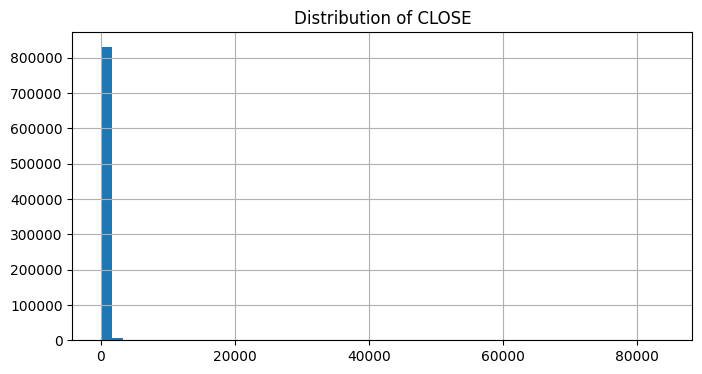

In [6]:
# Price column distribution (Close price if available)
price_candidates = [c for c in df.columns if 'close' in c.lower() or 'price' in c.lower()]
print('Potential price columns:', price_candidates)

if price_candidates:
    price_col = price_candidates[0]
    df[price_col] = pd.to_numeric(df[price_col], errors='coerce')
    df[price_col].hist(bins=50, figsize=(8, 4))
    plt.title(f'Distribution of {price_col}')
    plt.show()

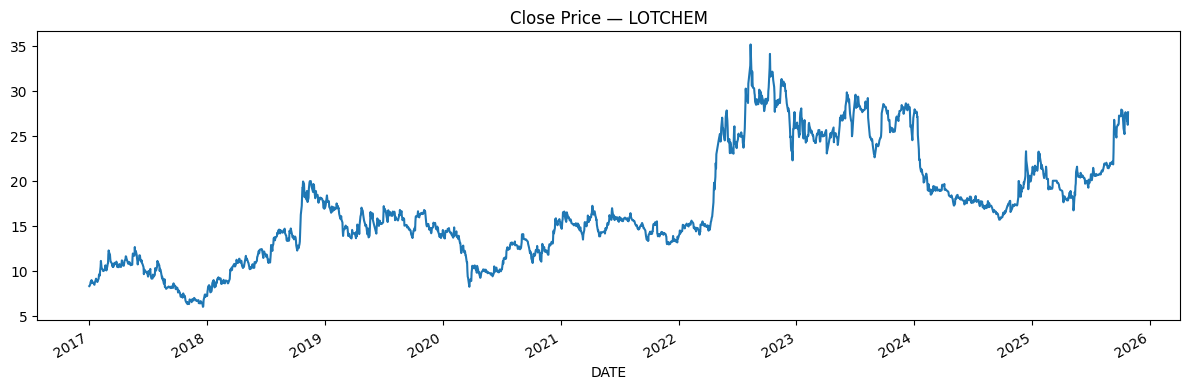

In [7]:
# Price trend over time for a sample ticker (adjust ticker name)
if ticker_candidates and date_candidates and price_candidates:
    sample_ticker = df[ticker_col].value_counts().index[0]
    sample = df[df[ticker_col] == sample_ticker].sort_values(date_col)
    sample.set_index(date_col)[price_col].plot(figsize=(12, 4), title=f'Close Price — {sample_ticker}')
    plt.tight_layout()
    plt.show()

## EDA Conclusions
- [ ] Available columns: ...
- [ ] Number of unique tickers: ...
- [ ] Date range: ...
- [ ] Missing values: ...
- [ ] Key tickers matching CNH-PSX categories: ...
- [ ] Useful for recency weighting: yes/no
- [ ] Key points to address: ...